# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [121]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [122]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [123]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [124]:
# The monthly amount for the member's household income
#variable can be easily set for a variety of monthly incomes
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [125]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
# there is a different URL that must be set for each crypto coin
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [126]:
# Using the Python requests library, make an API call to access the current price of BTC
#Use the requests.get function and note the json file
btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
#printing a brief header of the JS code.  This can then be used to sort the data in the next step
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18759256,
            "id": 1,
            "last_updated": 1626561884,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 595119008347,
                    "percent_change_1h": -0.552808601010039,
                    "percent_change_24h": 0.101286657275082,
                    "percent_change_7d": -6.63297783128951,
                    "percentage_change_1h": -0.552808601010039,
                    "percentage_change_24h": 0.101286657275082,
                    "percentage_change_7d": -6.63297783128951,
                    "price": 31718.0,
                    "volume_24h": 18153231112
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18759256,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [127]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()# YOUR CODE HERE

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# similar code to the bitcoin data
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 116734560,
            "id": 1027,
            "last_updated": 1626562189,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 222301173990,
                    "percent_change_1h": -0.538011199635003,
                    "percent_change_24h": 1.08068668752251,
                    "percent_change_7d": -11.6455336899485,
                    "percentage_change_1h": -0.538011199635003,
                    "percentage_change_24h": 1.08068668752251,
                    "percentage_change_7d": -11.6455336899485,
                    "price": 1905.44,
                    "volume_24h": 15061192429
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116734560,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [128]:
# Navigate the BTC response object to access the current price of BTC
# Setting the series of rosw to find the price data
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Print the current price of BTC
print(f"The price for Bitcoin is {btc_price}")


The price for Bitcoin is 31718.0


In [129]:
# Navigate the BTC response object to access the current price of ETH
# Setting the series of rosw to find the price data
eth_price = eth_response['data']['1027']['quotes']['USD']['price']


# Print the current price of ETH
print(f"The price for Ethereum is {eth_price}")

The price for Ethereum is 1905.44


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [130]:
# Compute the current value of the BTC holding 
# value is simply price times quantity
btc_value = btc_price*btc_coins
# Print current value of your holding in BTC
print(f"The current value of your Bitcoin holdings is {btc_value}")

The current value of your Bitcoin holdings is 38061.6


In [131]:
# Compute the current value of the ETH holding
# value is simply price times quantity
eth_value = eth_price*eth_coins

# Print current value of your holding in ETH
print(f"The current value of your Ethereum holdings is {eth_value}")

The current value of your Ethereum holdings is 10098.832


In [132]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current value of your total Crypto holdings is {total_crypto_wallet}")

The current value of your total Crypto holdings is 48160.432


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [133]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [134]:
# Set the variables for the Alpaca API and secret keys
#each key is pulled by its title in the .env file
alpaca_key_id = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
# input the two keys and set the api version to 2
alpaca_api = tradeapi.REST(alpaca_key_id, alpaca_secret_key, api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [135]:
# Set the tickers for both the bond and stock portion of the portfolio
#Create a couple of new variables
tickers = ["SPY", "AGG"]
# Set timeframe to 1D 
timeframe = "1D"
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [177]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
#creating portfolio dataframe
stock_portfolio = alpaca_api.get_barset(tickers,timeframe,start = start_date,end = end_date).df
#stock_portfolio.set_index('time', inplace = True)
# Review the first 5 rows of the Alpaca DataFrame
stock_portfolio.head()

AGG                                       \
                             open      high     low    close    volume   
time                                                                     
2020-06-01 00:00:00-04:00  117.35  117.3999  117.24  117.365  10635820   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2020-06-01 00:00:00-04:00  303.62  306.205  303.06  305.58  92628393

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [181]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = stock_portfolio['AGG']['close'][0]# YOUR CODE HERE

# Print the AGG closing price
# YOUR CODE HERE
print(agg_close_price)

117.365


In [182]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = stock_portfolio['SPY']['close'][0]# YOUR CODE HERE

# Print the SPY closing price
print(spy_close_price)

305.58


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [183]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares# YOUR CODE HERE

# Print the current value of the bond portfolio
print(f"The current value of your AGG holdings is {agg_value}")

The current value of your AGG holdings is 23473.0


In [184]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares


# Print the current value of the stock portfolio
print(f"The current value of your SPY holdings is {spy_value}")

The current value of your SPY holdings is 33613.799999999996


In [185]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current value of your stock and bond holdings is {total_stocks_bonds}")

The current value of your stock and bond holdings is 57086.799999999996


In [186]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The current value of all your money is {total_portfolio}")

The current value of all your money is 105247.23199999999


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [187]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet,total_stocks_bonds]
# Review the Python list savings_data
print(savings_data)

[48160.432, 57086.799999999996]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [188]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(savings_data,index = ['crypto','stock/bond'],columns = ['amount'])
# Display the savings_df DataFrame

savings_df.head()

,amount
crypto,48160.432
stock/bond,57086.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Weights'}, ylabel='amount'>

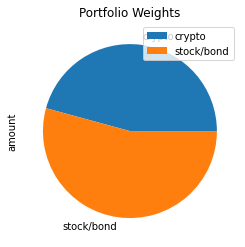

In [193]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(kind='pie',y = 'amount',title = 'Portfolio Weights')
 

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [146]:
# Create a variable named emergency_fund_value

emergency_fund_value = 3*monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [190]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print('Great, you are rich enough to get fired')

if total_portfolio == emergency_fund_value:
    print('You have enough money to survive getting fired, but it would be good to save some more just to be safe')

if total_portfolio < emergency_fund_value:
    print('Do not get fired, you do not have enough emergency funds to eat!')
            



Great, you are rich enough to get fired


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [148]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 

start_date_two = pd.Timestamp("2010-05-01", tz="America/New_York").isoformat()
end_date_two = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()




In [149]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame


part_two_prices_df = alpaca_api.get_barset(tickers,timeframe,start=start_date_two,end=end_date_two).df
# Display both the first and last five rows of the DataFrame

part_two_prices_df.head()
part_two_prices_df.tail()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-04-27 00:00:00-04:00  285.12  288.2700  284.62  287.11  135955115  
2020-04-28 00:00:00-04:00  291.02  291.4000  285.40  285.77  192772205  
2020-04-29 00:00:00-04:00  291.53  294.8800  290.41  293.19  204606690  
2020-04-30 00:00:00-04:00  291.71  293.3239  288.59  290.39  204197726  
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  222309009

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [150]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
mc_thirty_year = MCSimulation(
    portfolio_data = part_two_prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
mc_thirty_year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2019-12-09 00:00:00-05:00  112.69  112.72  112.565  112.58  4416131   
2019-12-10 00:00:00-05:00  112.67  112.67  112.490  112.54  2689383   
2019-12-11 00:00:00-05:00  112.67  112.90  112.610  112.84  2184383   
2019-12-12 00:00:00-05:00  112.79  112.79  112.220  112.36  4359234   
2019-12-13 00:00:00-05:00  112.58  112.86  112.400  112.80  3251499   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-12-09 00:00:00-05:00          NaN  314.44  315.18  313.800  313.87   
2019-12-10 00:00:00-05:00    -0.000355  313.82  314.55  312.810  313.55   
2019-12-11 00:00:00-05:00     0.002666  314.03  314.70  313.595  314.41   
2019-12-12 00:00:00-05:00    -0.004254  314.43  317.99  314.170  317.14   
2019-12-13 00:00:00-05:00     0.003916  316.87  318.67  316.020  317.28   

                                                  
                             volume daily_return  
time                                              
2019-12-09 00:00:00-05:00  28676682          NaN  
2019-12-10 00:00:00-05:00  40282469    -0.001020  
2019-12-11 00:00:00-05:00  40711586     0.002743  
2019-12-12 00:00:00-05:00  78481712     0.008683  
2019-12-13 00:00:00-05:00  64520010     0.000441

In [151]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005564,0.979309,0.995778,0.994597,0.988419,1.014576,1.009121,1.005790,0.998208,1.003028,...,1.006825,1.015835,0.997781,1.008593,0.971056,0.997967,1.008204,0.993257,0.983661,0.997409
2,1.032853,0.970206,1.005021,1.016661,0.990780,1.034354,1.024104,1.000696,0.980477,1.013281,...,0.996650,1.025346,0.993764,0.990304,0.979082,1.009742,1.002377,0.991319,0.994810,1.021754
3,1.042144,0.966434,1.003787,1.021045,0.993004,1.025235,1.025756,1.004085,1.002755,0.999555,...,0.986329,1.020697,0.992025,0.985649,0.973436,1.023489,1.000773,1.002346,0.993747,1.014343
4,1.054609,0.957123,1.032765,1.011937,0.984534,1.031393,1.036466,1.010794,1.001875,0.971298,...,0.992270,1.006769,0.989871,0.987894,0.979301,1.007829,1.013826,0.993622,1.016118,1.019525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.865107,0.766617,3.217288,0.573893,0.130288,2.191131,0.037555,1.520256,0.057148,0.144475,...,1.511016,0.359057,0.249808,0.762801,0.531247,0.815286,1.983518,0.111003,0.392467,1.399305
7557,0.865365,0.771901,3.270929,0.577952,0.131698,2.196793,0.037537,1.533163,0.056104,0.145687,...,1.515026,0.354705,0.250119,0.777521,0.522379,0.800439,2.045926,0.111870,0.398158,1.412064
7558,0.877302,0.764718,3.280900,0.584451,0.129585,2.188574,0.037165,1.510974,0.056188,0.146291,...,1.535286,0.365347,0.248050,0.775911,0.529414,0.802093,2.031897,0.111445,0.393340,1.405057
7559,0.897809,0.779561,3.229083,0.587197,0.131419,2.177014,0.037628,1.541641,0.056613,0.145674,...,1.544096,0.364509,0.250021,0.756674,0.541406,0.793671,2.041582,0.114197,0.391293,1.391667


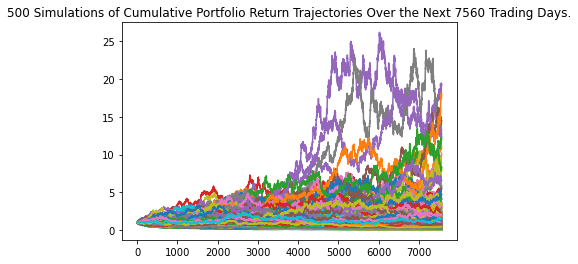

In [152]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
#call the plot simulation and save the graph to the folder
MC_sim_line_plot = mc_thirty_year.plot_simulation()
MC_sim_line_plot.get_figure().savefig("MC_thirty__sim_plot.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

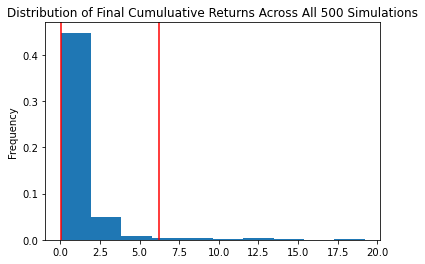

In [153]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram and saving the file to folder
MC_sim_dist_plot = mc_thirty_year.plot_distribution()
MC_sim_dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [154]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_summary_statistics = mc_thirty_year.summarize_cumulative_return()

# Print summary statistics Series
# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              1.140719
std               2.025226
min               0.012505
25%               0.252261
50%               0.543851
75%               1.232723
max              19.209980
95% CI Lower      0.056875
95% CI Upper      6.236593
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [155]:
# Print the current balance of the stock and bond portion of the members portfolio



In [156]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * 10000# YOUR CODE HERE
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * 10000# YOUR CODE HERE

# Print the result of your calculations
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)

568.7489641406942
62365.93094139405


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [157]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
#similar to 30 year simulation, but set to 10 years with different weights
mc_ten_year = MCSimulation(
    portfolio_data = part_two_prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
mc_ten_year.portfolio_data.head()



AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2019-12-09 00:00:00-05:00  112.69  112.72  112.565  112.58  4416131   
2019-12-10 00:00:00-05:00  112.67  112.67  112.490  112.54  2689383   
2019-12-11 00:00:00-05:00  112.67  112.90  112.610  112.84  2184383   
2019-12-12 00:00:00-05:00  112.79  112.79  112.220  112.36  4359234   
2019-12-13 00:00:00-05:00  112.58  112.86  112.400  112.80  3251499   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-12-09 00:00:00-05:00          NaN  314.44  315.18  313.800  313.87   
2019-12-10 00:00:00-05:00    -0.000355  313.82  314.55  312.810  313.55   
2019-12-11 00:00:00-05:00     0.002666  314.03  314.70  313.595  314.41   
2019-12-12 00:00:00-05:00    -0.004254  314.43  317.99  314.170  317.14   
2019-12-13 00:00:00-05:00     0.003916  316.87  318.67  316.020  317.28   

                                                  
                             volume daily_return  
time                                              
2019-12-09 00:00:00-05:00  28676682          NaN  
2019-12-10 00:00:00-05:00  40282469    -0.001020  
2019-12-11 00:00:00-05:00  40711586     0.002743  
2019-12-12 00:00:00-05:00  78481712     0.008683  
2019-12-13 00:00:00-05:00  64520010     0.000441

In [158]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_year.calc_cumulative_return() n

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996001,1.003471,0.997957,1.000298,1.000492,0.997919,0.993119,0.994452,1.005313,0.981636,...,0.992486,1.004889,1.001529,0.996614,0.993392,1.002200,1.001387,1.000528,0.982002,0.993825
2,0.996127,1.021551,0.996949,1.007881,0.994673,0.994768,0.998703,0.994149,1.004181,0.964700,...,0.991579,0.997177,1.027779,1.000369,0.993931,1.005999,0.988015,1.018151,0.983594,0.984649
3,0.990279,1.026371,0.993273,0.990541,0.993520,1.004322,1.000771,0.996087,1.015687,0.963314,...,1.000355,0.986785,1.045356,1.019638,0.990695,1.009741,0.985485,1.027505,0.978825,0.975391
4,0.993809,1.022355,0.992732,1.003955,0.985387,1.001625,0.997669,0.987029,1.027383,0.973269,...,1.004964,1.009573,1.048260,1.038619,0.979847,1.007872,1.004425,1.031174,0.986353,0.976180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.004697,1.409606,1.566719,1.626405,1.489894,1.974992,1.329357,0.983949,2.420468,2.275030,...,0.640372,1.118849,1.467636,1.585402,1.057332,1.935081,4.033282,1.465003,1.262611,1.610127
2517,1.021973,1.406481,1.544547,1.618136,1.499633,1.959816,1.336656,0.970824,2.412393,2.272745,...,0.643412,1.114857,1.483452,1.588974,1.065783,1.922530,4.089088,1.468674,1.243636,1.594071
2518,1.020211,1.394227,1.533825,1.606290,1.468121,1.959182,1.311446,0.979620,2.395378,2.288585,...,0.646252,1.124226,1.474962,1.569615,1.079897,1.942068,4.062906,1.473540,1.260808,1.584785
2519,1.029550,1.403412,1.536361,1.615689,1.463938,1.961338,1.308465,0.967815,2.389311,2.288038,...,0.646847,1.125820,1.486880,1.582238,1.075022,1.960516,3.987384,1.461019,1.256905,1.576640


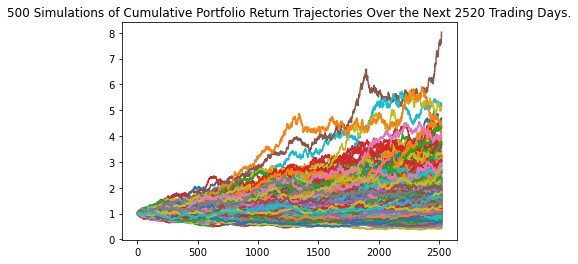

In [159]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_ten = mc_ten_year.plot_simulation()
MC_sim_line_plot_ten.get_figure().savefig("MC_ten_sim_plot.png", bbox_inches="tight")

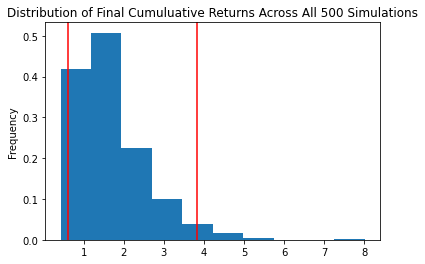

In [160]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_ten = mc_ten_year.plot_distribution()
MC_sim_dist_plot_ten.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [161]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_ten = mc_ten_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_ten)

count           500.000000
mean              1.705737
std               0.889773
min               0.416278
25%               1.092744
50%               1.491051
75%               2.098688
max               8.019618
95% CI Lower      0.606145
95% CI Upper      3.820187
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [162]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [163]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_ten[8] * 10000# YOUR CODE HERE
ci_upper_ten_cumulative_return = MC_summary_statistics_ten[9] * 10000# YOUR CODE HERE

# Print the result of your calculations
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)

6061.454819445641
38201.86949908262


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?